# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [10]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Konfigurasi peringatan agar notebook lebih bersih
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [11]:
#Type your code here

# Memuat dataset
# Pastikan file stroke.csv berada di folder yang sama atau sesuaikan path-nya
df = pd.read_csv('stroke.csv')

# Menampilkan 5 baris pertama
print("Data Head:")
display(df.head())

# Menampilkan ukuran dataset
print(f"Dimensi Data: {df.shape}")

Data Head:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Dimensi Data: (4981, 11)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
#Type your code here

df.info()
print("\nJumlah Missing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB

Jumlah Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level   

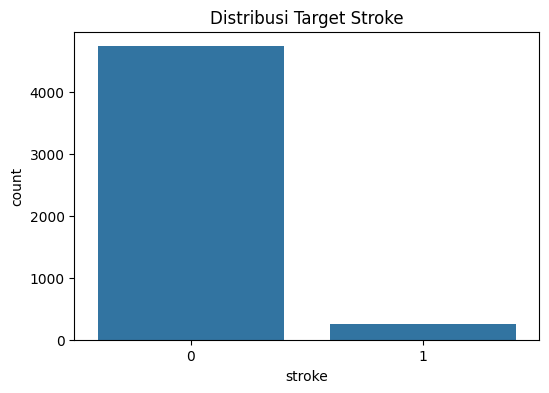

stroke
0    4733
1     248
Name: count, dtype: int64


In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Distribusi Target Stroke')
plt.show()
print(df['stroke'].value_counts())

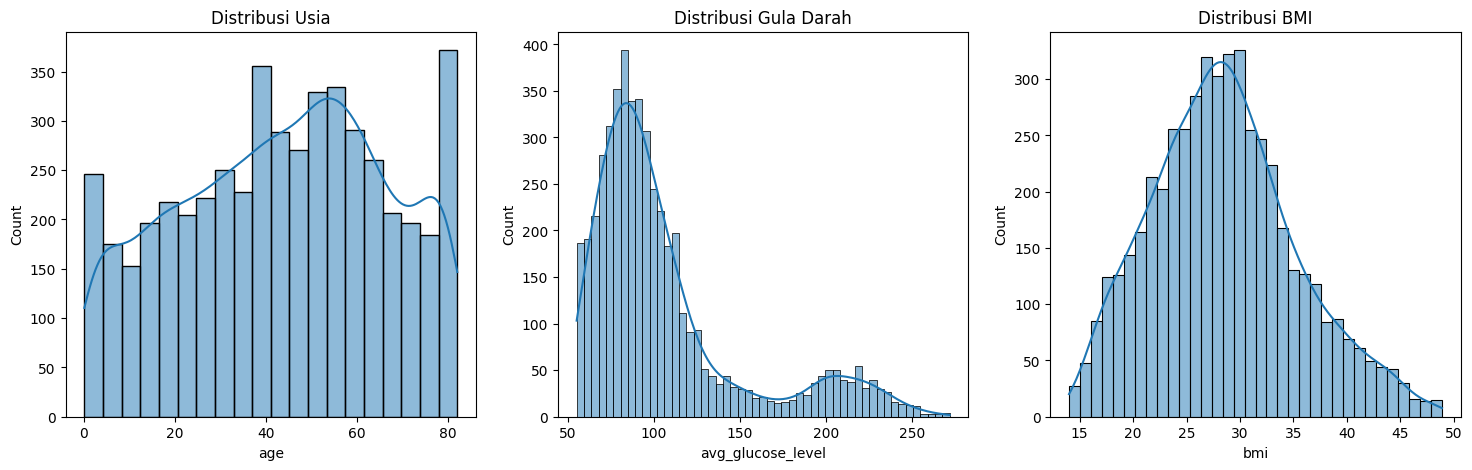

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], kde=True, ax=axes[0]).set_title('Distribusi Usia')
sns.histplot(df['avg_glucose_level'], kde=True, ax=axes[1]).set_title('Distribusi Gula Darah')
sns.histplot(df['bmi'], kde=True, ax=axes[2]).set_title('Distribusi BMI')
plt.show()

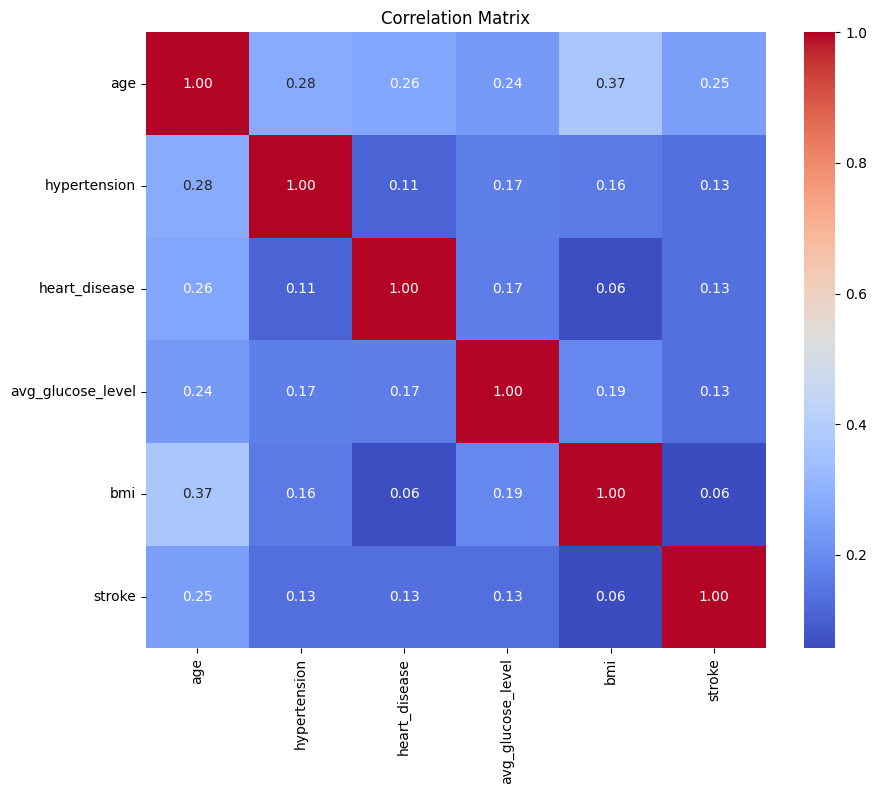

In [15]:
# Encoding sederhana sementara untuk melihat korelasi
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# --- 0. Load Data (Pastikan dataframe sudah dimuat sebelumnya) ---
# df = pd.read_csv('path_to_your_data.csv')

# --- 1. Menghapus Data Duplikat (Sesuai Ketentuan) ---
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Data duplikat dihapus: {initial_shape[0] - df.shape[0]} baris.")

# --- 2. Menangani Missing Values pada BMI ---
# Jika ada nilai 'N/A' yang terbaca sebagai string, coerce ke numeric dulu
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Mengisi NaN dengan median
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# --- 3. Menghapus kolom 'id' ---
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# --- 4. Encoding Kategorikal ---
# Identifikasi kolom
cat_cols = df.select_dtypes(include=['object']).columns
# Pastikan target 'stroke' tidak ikut di-encoding jika tipe datanya integer
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('stroke', errors='ignore')

# One-Hot Encoding (drop_first=True untuk menghindari multicollinearity)
df_processed = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# --- 5. Splitting Data ---
X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

# Split 80:20 dengan stratify agar proporsi stroke seimbang di train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 6. Scaling (Standarisasi) ---
# Scaling hanya pada kolom numerik asli
scaler = StandardScaler()

# Perhatian: num_cols mungkin perlu disesuaikan jika ada kolom numerik yang berubah nama atau hilang
# Cara aman: scale seluruh X jika semua fitur sudah numerik (hasil encoding)
# Atau selektif pada kolom numerik awal (umur, bmi, glucose)
cols_to_scale = ['age', 'avg_glucose_level', 'bmi']
# Pastikan kolom tersebut ada di X_train
valid_cols_to_scale = [col for col in cols_to_scale if col in X_train.columns]

X_train[valid_cols_to_scale] = scaler.fit_transform(X_train[valid_cols_to_scale])
X_test[valid_cols_to_scale] = scaler.transform(X_test[valid_cols_to_scale])

print("Data Preprocessing Selesai.")
print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

Data duplikat dihapus: 0 baris.
Data Preprocessing Selesai.
Shape X_train: (3984, 14)
Shape X_test: (997, 14)


In [17]:
# Menyimpan hasil preprocessing ke file CSV

# 1. Tentukan lokasi penyimpanan sesuai struktur folder submission
output_folder = 'preprocessing/namadataset_preprocessing'

# 2. Buat folder otomatis jika belum ada
os.makedirs(output_folder, exist_ok=True)

# 3. Simpan DataFrame 'df' (yang sudah bersih dari null & duplikat) ke CSV
# Catatan: Variabel 'df' diambil dari cell sebelumnya yang sudah melalui proses cleaning
output_path = f'{output_folder}/data_clean.csv'
df.to_csv(output_path, index=False)

print(f"✅ SUKSES! Dataset hasil eksperimen berhasil disimpan di: {output_path}")
print("Silakan cek folder 'preprocessing/namadataset_preprocessing' di komputer Anda.")

✅ SUKSES! Dataset hasil eksperimen berhasil disimpan di: preprocessing/namadataset_preprocessing/data_clean.csv
Silakan cek folder 'preprocessing/namadataset_preprocessing' di komputer Anda.
